# Time Efficiency Comparison - workers

In [1]:
import pickle
import time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from plot_comparison import plot_time_and_speedup, plot_gpu_usage

In [2]:
def load_file(pkl_file_path):
    with open(pkl_file_path, 'rb') as file:
        loaded_data = pickle.load(file)
        return loaded_data

## Load serial info

In [3]:
workers_0__trainer = load_file('res/workers_0__trainer.pkl')
workers_0__trainer.display_info()


total_time: 1833.5770535469055
best_valid_acc: 0.6451172319599363
train_loss: [2.63790635148091, 2.0147399205473238, 1.825854827501865, 1.2213808214094137, 1.2085311142945516]
train_acc: [tensor(0.3419, device='cuda:0', dtype=torch.float64), tensor(0.4722, device='cuda:0', dtype=torch.float64), tensor(0.5156, device='cuda:0', dtype=torch.float64), tensor(0.6453, device='cuda:0', dtype=torch.float64), tensor(0.6482, device='cuda:0', dtype=torch.float64)]
valid_loss: [2.261227463416784, 1.8100944576225708, 1.6800238144050392, 1.2316015742714086, 1.2189923811889634]
valid_acc: [tensor(0.4013, device='cuda:0', dtype=torch.float64), tensor(0.5250, device='cuda:0', dtype=torch.float64), tensor(0.5383, device='cuda:0', dtype=torch.float64), tensor(0.6402, device='cuda:0', dtype=torch.float64), tensor(0.6451, device='cuda:0', dtype=torch.float64)]
epo_elapsed_time: [381.71427154541016, 360.2976553440094, 365.49813079833984, 362.1847198009491, 363.2924702167511]
max_alloc: [1959.470703125, 195

## Load multi-worker info

In [4]:
workers_2__trainer = load_file('res/workers_2__trainer.pkl')
workers_4__trainer = load_file('res/workers_4__trainer.pkl')
workers_8__trainer = load_file('res/workers_8__trainer.pkl')

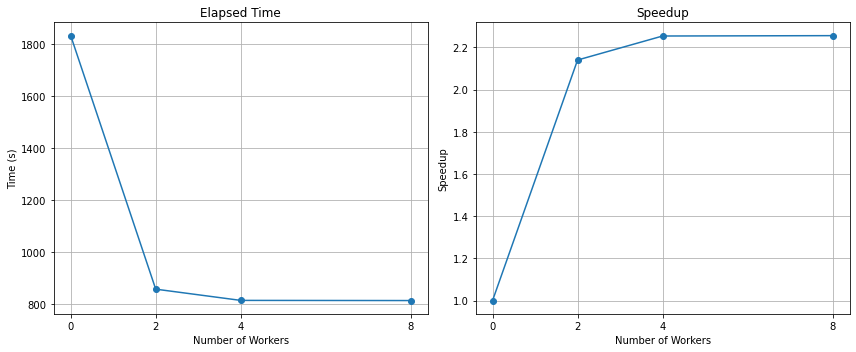

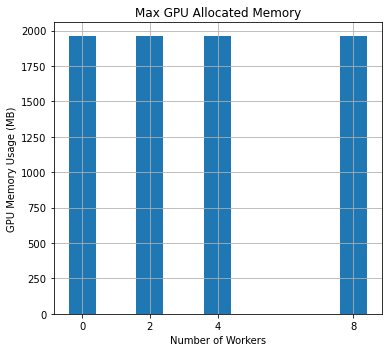

In [5]:
def multi_workers_comp():
    trainer_list = [workers_0__trainer, workers_2__trainer, workers_4__trainer, workers_8__trainer]
    worker_list = [0, 2, 4, 8]
    
    time_list = [t.total_time for t in trainer_list]
    speedup_list = [time_list[0] / t for t in time_list]
    max_alloc_list = [sum(t.history["max_alloc"]) / len(t.history["max_alloc"]) for t in trainer_list]

    plot_time_and_speedup("workers", worker_list, time_list, speedup_list)
    plot_gpu_usage("workers", worker_list, max_alloc_list)

multi_workers_comp()